# Fashion_Retail_Sales


## Install lib

In [44]:
%pip install vectice -U
%pip install vectice[autolog]
%pip install pandas
%pip install sklearn
%pip install matplotlib
%pip install seaborn
%pip install xgboost

  Obtaining dependency information for vectice from https://files.pythonhosted.org/packages/ef/8c/82a9d60575aa8a771377c1c0e07cbf0753ffff12849bfb1fae0117684c31/vectice-23.4.5.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.7/167.7 kB 396.3 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: vectice
    Found existing installation: vectice 23.4.5.0.dev1732
    Uninstalling vectice-23.4.5.0.dev1732:
      Successfully uninstalled vectice-23.4.5.0.dev1732

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
zsh:1: no matches found: vectice[autolog]
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)

In [1]:
from vectice import autolog
autolog.config(api_token="BxKyEJKGZ.9Qrm8P6LanyeEWpNvgoVlBxKyEJKGZzj30dkMRX279JOb4YDAw", phase="PHA-3855") # copy and paste your api key and your phase id

Phase 'Fashion retail sails' successfully retrieved.

For quick access to the Phase in the Vectice web app, visit:
https://app.vectice.com/browse/phase/PHA-3855
Welcome, bdaversa. You`re now successfully connected to Vectice.


<a name="l1.1"></a>
##  1.1 Tools
In this lab, we will make use of: 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sn
import warnings
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')

<a name="l1.2"></a>
## 1.2 Data Loading

- The Dataset that used in this project is <a href="https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction">Heart Failure Prediction Dataset</a>

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/vectice/GettingStarted/main/23.4/samples/autolog/Fashion_Retail_Sales.csv")
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


<a name="l1.3"></a>
## 1.3 Goal

<a name="l2"></a>
#  2 Data Observation

<a name="l2.1"></a>
##  2.1 null values

In [4]:
df.isna().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

In [5]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['Purchase Amount (USD)'] = imputer.fit_transform(df['Purchase Amount (USD)'].values.reshape(-1, 1))
df['Review Rating'] = imputer.fit_transform(df['Review Rating'].values.reshape(-1, 1))

<a name="l2.2"></a>
## 2.2 Duplicated Data

In [6]:
df.duplicated().sum()

0

<a name="l2.3"></a>
## 2.3 General Observation

In [7]:
df.describe()

,Customer Reference ID,Purchase Amount (USD),Review Rating
count,3400.000000,3400.000000,3400.000000
mean,4039.660588,156.709818,2.999057
std,48.122583,377.295576,1.100005
min,3957.000000,10.000000,1.000000
25%,3997.000000,70.000000,2.100000
50%,4040.000000,132.000000,2.999057
75%,4081.000000,156.709818,3.900000
max,4122.000000,4932.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  3400 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3400 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


In [9]:
for column in df:
    print(f"{column} - {len(df[column].unique())} : {df[column].unique()}")

Customer Reference ID - 166 : [4018 4115 4019 4097 3997 4080 4055 3973 4044 4010 4108 4067 4068 4102
 4096 4017 4001 3976 4103 4081 3986 4109 4075 4040 4099 3981 4070 4002
 4035 4060 3974 4110 3984 4054 4083 4122 3972 3980 4012 3992 4105 4119
 3957 3994 3995 4072 4093 4031 4056 4114 4104 4071 4007 4009 4038 4033
 4034 4045 3979 4106 3959 4113 4087 3989 4032 4051 3970 4100 4048 3985
 4029 3964 4057 4117 4011 4078 4005 4049 4063 3996 4030 3991 3975 3961
 3993 3978 4121 4073 4111 4065 4116 4003 4098 4047 4014 4004 3958 4084
 4085 4025 4062 4050 3965 3966 3977 4091 4028 4076 4089 4090 4077 4118
 4095 4036 4088 4041 4064 3999 4101 4023 4000 3963 4086 4021 3990 4027
 4022 3960 4092 4069 4120 4024 4059 4016 4037 3967 4026 4042 3982 4107
 4006 4043 3983 4046 4013 3971 3988 3987 4053 4066 4039 3998 4082 4008
 4079 4094 4074 3968 3969 4015 4052 4020 4061 3962 4112 4058]
Item Purchased - 50 : ['Handbag' 'Tunic' 'Tank Top' 'Leggings' 'Wallet' 'Onesie' 'Jacket'
 'Trousers' 'Jeans' 'Loafers' 'Slippe

<a name="l3"></a>
#  3 Preprocessing

<a name="l3.1"></a>
##  3.1 Date Purchase

In [10]:
def dateconvertor(df):
    new_df = df.copy()
    token = df["Date Purchase"].split("-")
    new_df["Year"] = int(token[0])
    new_df["Month"] = int(token[1])
    new_df["Day"] = int(token[2])
    return new_df

In [11]:
df1 = df.apply(dateconvertor,axis=1)
df1.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Year,Month,Day
0,4018,Handbag,4619.0,2023-02-05,2.999057,Credit Card,2023,2,5
1,4115,Tunic,2456.0,2023-07-11,2.000000,Credit Card,2023,7,11
2,4019,Tank Top,2102.0,2023-03-23,4.100000,Cash,2023,3,23
3,4097,Leggings,3126.0,2023-03-15,3.200000,Cash,2023,3,15
4,3997,Wallet,3003.0,2022-11-27,4.700000,Cash,2022,11,27


In [12]:
df1.drop(["Date Purchase", "Customer Reference ID"], axis = 1, inplace = True)

<a name="l3.2"></a>

## 3.2 Item Purchased

In [13]:
df1["Item Purchased"].value_counts()

Item Purchased
Belt             90
Skirt            88
Shorts           87
Pants            86
Tank Top         82
T-shirt          82
Pajamas          81
Camisole         76
Loafers          76
Hoodie           75
Poncho           73
Socks            73
Kimono           73
Blouse           73
Wallet           73
Handbag          72
Cardigan         72
Vest             71
Sneakers         71
Onesie           71
Backpack         71
Blazer           71
Umbrella         70
Raincoat         69
Trench Coat      68
Hat              68
Sunglasses       67
Coat             67
Scarf            66
Swimsuit         66
Boots            65
Jacket           64
Romper           64
Flannel Shirt    63
Leggings         62
Sweater          62
Overalls         61
Tunic            61
Polo Shirt       59
Gloves           59
Jeans            58
Slippers         58
Trousers         58
Jumpsuit         57
Dress            57
Tie              57
Sandals          54
Bowtie           52
Flip-Flops       51
Sun H

In [14]:
df1

,Item Purchased,Purchase Amount (USD),Review Rating,Payment Method,Year,Month,Day
0,Handbag,4619.000000,2.999057,Credit Card,2023,2,5
1,Tunic,2456.000000,2.000000,Credit Card,2023,7,11
2,Tank Top,2102.000000,4.100000,Cash,2023,3,23
3,Leggings,3126.000000,3.200000,Cash,2023,3,15
4,Wallet,3003.000000,4.700000,Cash,2022,11,27
...,...,...,...,...,...,...,...
3395,Shorts,37.000000,2.700000,Cash,2023,7,9
3396,Slippers,176.000000,2.500000,Cash,2023,3,16
3397,Onesie,156.709818,2.400000,Credit Card,2022,10,3
3398,Sandals,128.000000,1.800000,Cash,2023,1,1


In [15]:
df2 = pd.get_dummies(df1, columns = ["Item Purchased"])
df2.head()

,Purchase Amount (USD),Review Rating,Payment Method,Year,Month,Day,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blazer,Item Purchased_Blouse,...,Item Purchased_Swimsuit,Item Purchased_T-shirt,Item Purchased_Tank Top,Item Purchased_Tie,Item Purchased_Trench Coat,Item Purchased_Trousers,Item Purchased_Tunic,Item Purchased_Umbrella,Item Purchased_Vest,Item Purchased_Wallet
0,4619.0,2.999057,Credit Card,2023,2,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2456.0,2.000000,Credit Card,2023,7,11,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2102.0,4.100000,Cash,2023,3,23,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,3126.0,3.200000,Cash,2023,3,15,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3003.0,4.700000,Cash,2022,11,27,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [16]:
columns = ["Purchase Amount (USD)", "Review Rating", "Year", "Month", "Day"]
scaler = StandardScaler()
df2[columns] = scaler.fit_transform(df2[columns])
df2.head()

,Purchase Amount (USD),Review Rating,Payment Method,Year,Month,Day,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blazer,Item Purchased_Blouse,...,Item Purchased_Swimsuit,Item Purchased_T-shirt,Item Purchased_Tank Top,Item Purchased_Tie,Item Purchased_Trench Coat,Item Purchased_Trousers,Item Purchased_Tunic,Item Purchased_Umbrella,Item Purchased_Vest,Item Purchased_Wallet
0,11.828780,0.000000,Credit Card,0.578709,-1.313766,-1.212841,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6.095031,-0.908363,Credit Card,0.578709,0.140935,-0.532631,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,5.156637,1.001000,Cash,0.578709,-1.022826,0.827789,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,7.871089,0.182701,Cash,0.578709,-1.022826,-0.079158,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7.545036,1.546532,Cash,-1.727985,1.304696,1.281262,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [17]:
class_name = ["Credit Card", "Cash"]
df2["Payment Method"] = df2["Payment Method"].replace(class_name, [1, 0])
df2.head()

,Purchase Amount (USD),Review Rating,Payment Method,Year,Month,Day,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blazer,Item Purchased_Blouse,...,Item Purchased_Swimsuit,Item Purchased_T-shirt,Item Purchased_Tank Top,Item Purchased_Tie,Item Purchased_Trench Coat,Item Purchased_Trousers,Item Purchased_Tunic,Item Purchased_Umbrella,Item Purchased_Vest,Item Purchased_Wallet
0,11.828780,0.000000,1,0.578709,-1.313766,-1.212841,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6.095031,-0.908363,1,0.578709,0.140935,-0.532631,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,5.156637,1.001000,0,0.578709,-1.022826,0.827789,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,7.871089,0.182701,0,0.578709,-1.022826,-0.079158,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7.545036,1.546532,0,-1.727985,1.304696,1.281262,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Purchase Amount (USD)         3400 non-null   float64
 1   Review Rating                 3400 non-null   float64
 2   Payment Method                3400 non-null   int64  
 3   Year                          3400 non-null   float64
 4   Month                         3400 non-null   float64
 5   Day                           3400 non-null   float64
 6   Item Purchased_Backpack       3400 non-null   bool   
 7   Item Purchased_Belt           3400 non-null   bool   
 8   Item Purchased_Blazer         3400 non-null   bool   
 9   Item Purchased_Blouse         3400 non-null   bool   
 10  Item Purchased_Boots          3400 non-null   bool   
 11  Item Purchased_Bowtie         3400 non-null   bool   
 12  Item Purchased_Camisole       3400 non-null   bool   
 13  Ite

<a name="l4"></a>
#  4 Visualization

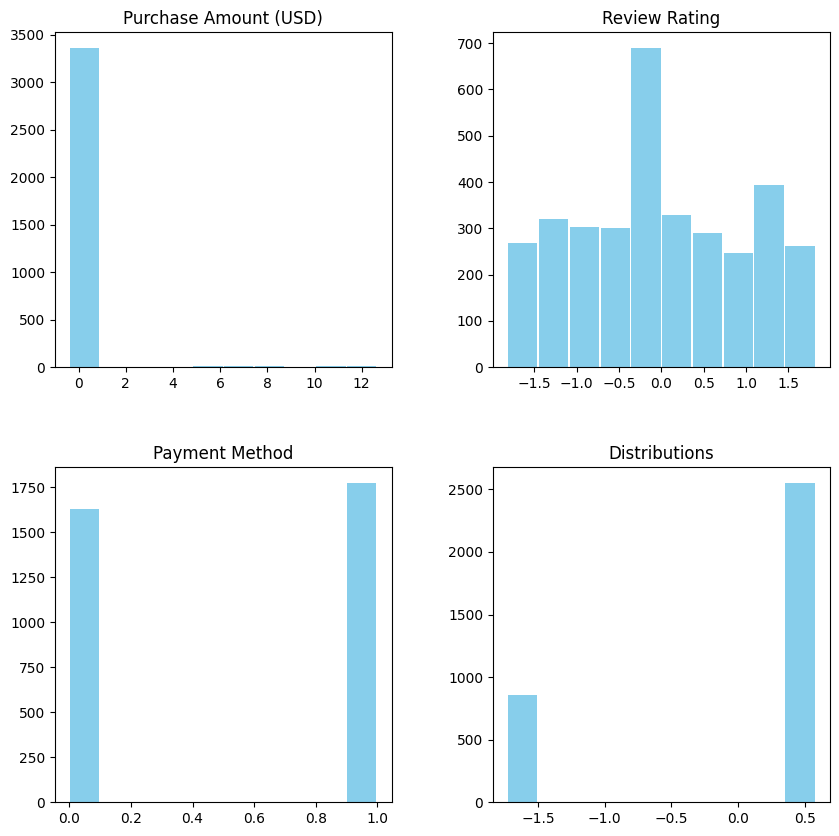

In [38]:
df2.hist(column=["Purchase Amount (USD)", "Review Rating", "Payment Method", "Year"],figsize = (10, 10), rwidth = 0.95, color = "skyblue", grid = False)
plt.title("Distributions")
plt.savefig("Distributions.png")

<a name="l4.1"></a>
##  4.1 OutLiers

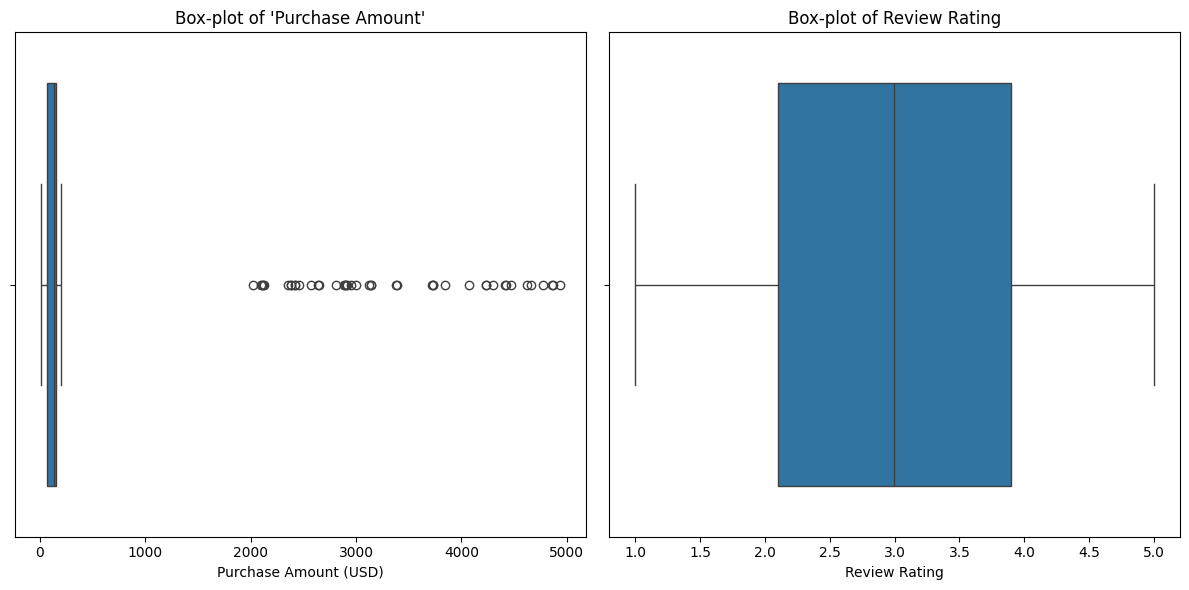

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sn.boxplot(x=df1["Purchase Amount (USD)"], ax=axes[0])
axes[0].set_title("Box-plot of 'Purchase Amount'")

sn.boxplot(x=df1["Review Rating"], ax=axes[1])
axes[1].set_title("Box-plot of Review Rating")

plt.tight_layout()
plt.savefig("box_plot.png")
plt.show()

In [21]:
def outliers(attr):
    Q1 = df1[attr].quantile(0.25)
    Q2 = df1[attr].quantile(0.5)
    Q3 = df1[attr].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    return df1[(df1[attr] < lower_bound) | (df1[attr]>upper_bound)]

In [22]:
len(outliers("Purchase Amount (USD)"))

43

<a name="l5"></a>
#  5 Spliting Data

In [23]:
X = df2.drop(["Payment Method"], axis = 1)
y = df2["Payment Method"]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
from sklearn.metrics import accuracy_score, roc_auc_score

XGB_model = XGBClassifier(n_estimators = 100, learning_rate=0.01)
XGB_model.fit(train_x, train_y)
XGB_model.score(test_x, test_y)

y_pred = XGB_model.predict(test_x)
roc_auc_XGB = roc_auc_score(y_pred, test_y)
accuracy_XGB = accuracy_score(y_pred, test_y)


0.5117647058823529

In [35]:
autolog.notebook()

New Iteration number 40 created.

For quick access to the Iteration in the Vectice web app, visit:
https://app.vectice.com/browse/iteration/ITR-1709
File: https://raw.githubusercontent.com/vectice/GettingStarted/main/23.4/samples/autolog/Fashion_Retail_Sales.csv wrapped successfully.
Dataset 'PHA-3855-df' logged in iteration 40.
Dataset 'PHA-3855-df1' logged in iteration 40.
Dataset 'PHA-3855-df2' logged in iteration 40.
Dataset 'PHA-3855-X' logged in iteration 40.
Model 'PHA-3855-XGB_model' logged in iteration 40.
Graph 'Distributions.png' logged in iteration 40.
Graph 'box_plot.png' logged in iteration 40.
